In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 

In [3]:
fp = 'data/Military_Expenditure.csv'

In [4]:
expenditure = pd.read_csv(fp)

In [5]:
expenditure.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
country_expenditure_2018 = expenditure.loc[expenditure['Type']=='Country'][['Name', '2018']].dropna().sort_values(by = '2018', ascending = False)

In [7]:
country_expenditure_2018.to_csv('to_plot/all_country_2018.csv', index = False)

In [8]:
expenditure['Type'].unique()

array(['Country', 'Regions Clubbed Geographically',
       'Semi Autonomous Region', 'Regions Clubbed Economically'],
      dtype=object)

In [9]:
rankings = expenditure.sort_values(by = '2018', ascending = False)

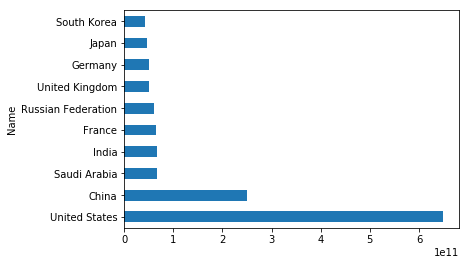

In [16]:
top10 = rankings.loc[rankings['Type'] == 'Country'][['Name', '2018']].iloc[:10]
top10.set_index('Name')['2018'].plot(kind = 'barh')

In [18]:
top10['2018'] = top10['2018']/1e10

In [19]:
(top10[['Name','2018']]).to_csv('to_plot/top_10.csv',index=False)

In [20]:
world = rankings.iloc[0]

In [21]:
cn_usa = expenditure.loc[(expenditure['Code'] == "CHN") | (expenditure['Code'] == 'USA')].T.iloc[4:]
cn_usa.columns = ['China', "\'Murica"]

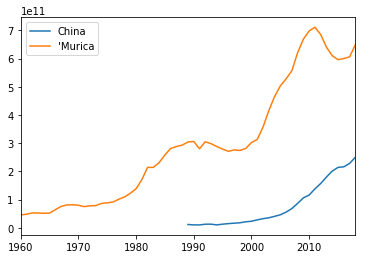

In [22]:
cn_usa.plot(kind = 'line')

-------------

1991 drop: dick chiney cuts millitary budget

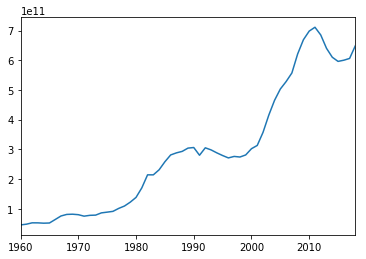

In [14]:
expenditure.loc[expenditure['Code'] == 'USA'].T.iloc[4:, 0].plot(kind = 'line')

In [137]:
usa_money = expenditure.loc[expenditure['Code'] == 'USA'].iloc[:,4:].T

In [138]:
usa_money.columns = ['USA']

In [143]:
(usa_money/1e11).to_csv('USA_expend.csv')

1. 1960–1975	Vietnam War	<br>United States and South Vietnam vs. North Vietnam<br>
2. 1961	Bay of Pigs Invasion	<br>United States vs. Cuba<br>
1. 1983	Grenada	<br>United States Intervention<br>
1. 1989	US Invasion of Panama	<br>United States vs. Panama<br>
1. 1990–1991	Persian Gulf War<br>	United States and Coalition Forces vs. Iraq<br>
1. 1995–1996	Intervention in Bosnia and Herzegovina	<br>United States as part of NATO acted peacekeepers in former Yugoslavia<br>
1. 2001–present	Invasion of Afghanistan<br>	United States and Coalition Forces vs. the Taliban regime in Afghanistan to fight terrorism.<br>
1. 2003–2011	Invasion of Iraq<br> United States and Coalition Forces vs. Iraq<br>

1. 2004–present	War in Northwest Pakistan<br>	United States vs. Pakstan, mainly drone attacks<br>
1. 2007–present	Somalia and Northeastern Kenya<br>	United States and Coalition forces vs. al-Shabaab militants<br>
1. 2009–2016	Operation Ocean Shield (Indian Ocean)<br>	NATO allies vs. Somali pirates<br>
1. 2011	Intervention in Libya<br>	US and NATO allies vs. Libya<br>
1. 2011–2017	Lord's Resistance Army<br>	US and allies against the Lord's Resistance Army in Uganda<br>
1. 2014–2017	US-led Intervention in Iraq<br>	US and coalition forces against the Islamic State of Iraq and Syria<br>
1. 2014–present	US-led intervention in Syria<br>	US and coalition forces against al-Qaeda, Isis, and Syria<br>
1. 2015–present	Yemeni Civil War<br>	Saudi-led coalition and US, France and Kingdom against the Houthi rebels, Supreme Political Council in Yemen and allies<br>
1. 2015–present	US intervention in Libya<br>	US and Libya against ISIS<br>

source<br>
https://www.thoughtco.com/american-involvement-wars-colonial-times-present-4059761<br>
https://www.nytimes.com/1990/01/30/us/the-1991-budget-armed-forces-cheney-would-cut-divisions-in-army-but-maintain-b-2.html

# But War, War never changes

In [112]:
top10.set_index('Name')

,2018
Name,
United States,6.490000e+11
China,2.500000e+11
Saudi Arabia,6.755467e+10
India,6.651029e+10
France,6.379968e+10
Russian Federation,6.138755e+10
United Kingdom,4.999719e+10
Germany,4.947063e+10
Japan,4.661795e+10


Choropleth of sum of war expenditure, and zoom in on the top 10

Choropleth Map

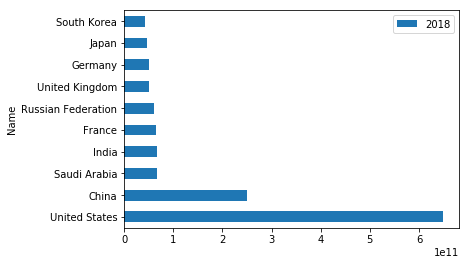

In [114]:
top10.set_index('Name').plot(kind = 'barh')

# Peace in our time

World expenditure in GDP%

In [36]:
exp_gdp_fp = 'data/expenditure_in_GDP.csv'

In [39]:
gdp_expenditure = pd.read_csv(exp_gdp_fp)

In [40]:
world_gdp_millitary = gdp_expenditure.loc[gdp_expenditure['Country Name'] == "World"].iloc[:, 4:].T
world_gdp_millitary.columns = ['World']

In [41]:
world_gdp_millitary.to_csv('to_plot/world_army_in_gdp_percent.csv')

Deployed troops

In [42]:
dep_unit_fp = 'data/total_units.csv'

In [44]:
dep_unit_df = pd.read_csv(dep_unit_fp, skiprows = 4)

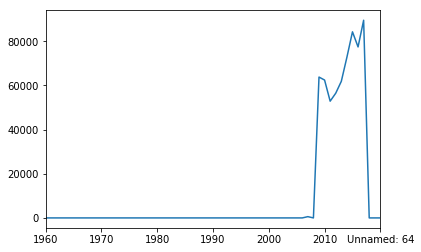

In [49]:
dep_unit_df.iloc[:, 4:].sum().plot(kind = 'line')

War Casualty

In [70]:
death_fp = 'data/battle_deaths.csv'

In [74]:
death_df = pd.read_csv(death_fp).drop('Code', axis = 1)

In [76]:
death_df.to_csv('death.csv', index = False)

In [78]:
death_df.head()

,Entity,Year,Battle-related deaths
0,Africa (inc. North Africa),1946,0.0
1,Africa (inc. North Africa),1947,0.0
2,Africa (inc. North Africa),1948,0.0
3,Africa (inc. North Africa),1949,0.0
4,Africa (inc. North Africa),1950,0.0


In [81]:
pd.pivot_table(data=death_df, index='Year', columns="Entity", values="Battle-related deaths").to_csv('to_plot/death_pivot.csv')

War expenditure in USD

In [82]:
usd_exp_fp = 'data/expenditure_in_USD.csv'

In [83]:
usd_exp_df = pd.read_csv(usd_exp_fp, skiprows = 4)

In [126]:
world_exp_usd = usd_exp_df.loc[(usd_exp_df['Country Name'] == 'World') | (usd_exp_df['Country Name'] == 'United States')].iloc[:, 4:-2].T
world_exp_usd.columns = ['USA', 'World']
(world_exp_usd/1e11).iloc[20:].to_csv('to_plot/world_exp_usd.csv')

In [129]:
(world_exp_usd/1e11).iloc[20:].to_csv('to_plot/world_exp_usd.csv')

In [130]:
world_exp_usd

,USA,World
1960,4.538000e+10,NaN
1961,4.780800e+10,NaN
1962,5.238100e+10,NaN
1963,5.229500e+10,NaN
1964,5.121300e+10,NaN
1965,5.182700e+10,NaN
1966,6.357200e+10,NaN
1967,7.544800e+10,NaN
1968,8.073200e+10,NaN
1969,8.144300e+10,NaN


-------------

In [49]:
gdp_fp = 'data/country_gdp_current.csv'

In [50]:
gdp_df = pd.read_csv(gdp_fp, skiprows = 4)

In [51]:
selected_countries = gdp_df.loc[
    gdp_df['Country Name']
    .apply(lambda x: x in ['Afghanistan', 'Yemen, Rep.', 'Libya', 'Syrian Arab Republic', 'Pakistan'
                          ])]

In [52]:
gdp_to_save_uncleaned = selected_countries.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).set_index('Country Name').T.iloc[:-2]

In [53]:
gdp_to_save_uncleaned.index = [int(i) for i in gdp_to_save_uncleaned.index]

In [59]:
(gdp_to_save_uncleaned.loc[2000:]/1e9).to_csv('to_plot/war_costs.csv')